# Часть 1. Тензоры и градиенты

In [ ]:
import torch

## Тензоры

In [ ]:
# Number
t1 = torch.tensor(4.)
t1

tensor(4.)

In [ ]:
torch.FloatTensor([4.]).dtype

torch.float32

In [ ]:
t1.dtype


torch.float32

In [ ]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [ ]:
# Matrix
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [ ]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [ ]:
print(t1)
t1.shape

tensor(4.)


torch.Size([])

In [ ]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [ ]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [ ]:
print(t4)
t4.shape

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])


torch.Size([2, 2, 3])

## Тензорные операции и градиенты

In [ ]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [ ]:
# Arithmetic operations
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [ ]:
# Compute derivatives
y.backward()

In [ ]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


## Взаимосвязь с Numpy

In [ ]:
xx = torch.tensor([1.0, 2.0], requires_grad=True)

In [ ]:
xx.numpy()

RuntimeError: ignored

In [ ]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

In [ ]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
x.dtype, y.dtype


(dtype('float64'), torch.float64)

In [ ]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

# Часть 2. Линейная регрессия

In [ ]:
import numpy as np
import torch

## Training data

<img src="https://i.imgur.com/6Ujttb4.png">

$$yieldapple  = w11 * temp + w12 * rainfall + w13 * humidity + b1$$

$$yieldorange = w21 * temp + w22 * rainfall + w23 * humidity + b2$$

<img src="https://i.imgur.com/4DJ9f8X.png">

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [ ]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [ ]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Модель линейной регрессии

In [ ]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-1.0374, -1.4705,  0.0714],
        [-1.2951,  0.5760, -1.0058]], requires_grad=True)
tensor([-1.0184,  0.1981], requires_grad=True)


<img src="https://i.imgur.com/WGXLFvA.png">

In [ ]:
def model(x):
    return x @ w.t() + b

In [ ]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-172.2049,  -99.0039],
        [-220.2597, -131.3423],
        [-284.1838,  -93.6329],
        [-167.4257, -144.3498],
        [-208.7721, -104.2774]], grad_fn=<AddBackward0>)


In [ ]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Loss function


In [ ]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [ ]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(65512.4258, grad_fn=<DivBackward0>)


## Градиенты

In [ ]:
# Compute gradients
loss.backward()

In [ ]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-1.0374, -1.4705,  0.0714],
        [-1.2951,  0.5760, -1.0058]], requires_grad=True)
tensor([[-23996.8555, -26780.5273, -16262.1797],
        [-17420.2617, -18274.1719, -11524.2285]])


In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


## Обновление весов во время градиентного спуска

In [ ]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[-172.2049,  -99.0039],
        [-220.2597, -131.3423],
        [-284.1838,  -93.6329],
        [-167.4257, -144.3498],
        [-208.7721, -104.2774]], grad_fn=<AddBackward0>)


In [ ]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(65512.4258, grad_fn=<DivBackward0>)


In [ ]:
# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-23996.8555, -26780.5273, -16262.1797],
        [-17420.2617, -18274.1719, -11524.2285]])
tensor([-286.7692, -206.5213])


In [ ]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
print(w)
print(b)

tensor([[-0.7975, -1.2027,  0.2341],
        [-1.1209,  0.7587, -0.8906]], requires_grad=True)
tensor([-1.0155,  0.2002], requires_grad=True)


In [ ]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(44317.9805, grad_fn=<DivBackward0>)


# Несколько эпох

In [ ]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [ ]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(207.6109, grad_fn=<DivBackward0>)


In [ ]:
# Predictions
preds

tensor([[ 61.1641,  69.5224],
        [ 88.2797,  90.2114],
        [ 98.4497, 158.0104],
        [ 45.6408,  31.2378],
        [ 97.9549, 104.3560]], grad_fn=<AddBackward0>)

In [ ]:
# Targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

## Второй способ

In [ ]:
import torch.nn as nn


In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [ ]:
from torch.utils.data import TensorDataset


In [ ]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [ ]:
from torch.utils.data import DataLoader


In [ ]:
# Define data loader
batch_size = 3
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[ 69.,  96.,  70.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.]])
tensor([[103., 119.],
        [ 81., 101.],
        [ 22.,  37.]])


In [ ]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4640,  0.4089, -0.0124],
        [-0.0736, -0.1421, -0.0420]], requires_grad=True)
Parameter containing:
tensor([0.4266, 0.0861], requires_grad=True)


In [ ]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[ 0.4640,  0.4089, -0.0124],
         [-0.0736, -0.1421, -0.0420]], requires_grad=True),
 Parameter containing:
 tensor([0.4266, 0.0861], requires_grad=True)]

In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 61.1611, -16.6162],
        [ 77.8394, -21.8078],
        [ 94.8658, -27.7972],
        [ 64.8789, -15.0896],
        [ 70.8277, -21.5764],
        [ 61.1611, -16.6162],
        [ 77.8394, -21.8078],
        [ 94.8658, -27.7972],
        [ 64.8789, -15.0896],
        [ 70.8277, -21.5764],
        [ 61.1611, -16.6162],
        [ 77.8394, -21.8078],
        [ 94.8658, -27.7972],
        [ 64.8789, -15.0896],
        [ 70.8277, -21.5764]], grad_fn=<AddmmBackward>)

In [ ]:
# Import nn.functional
import torch.nn.functional as F

In [ ]:
# Define loss function
loss_fn = F.mse_loss

In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(7440.7646, grad_fn=<MseLossBackward>)


In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.99)

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
fit(100, model, loss_fn, opt, train_dl)


Epoch [10/100], Loss: 1251.1332
Epoch [20/100], Loss: 74.3032
Epoch [30/100], Loss: 927.9119
Epoch [40/100], Loss: 721.0101
Epoch [50/100], Loss: 1970.5438
Epoch [60/100], Loss: 1272.7545
Epoch [70/100], Loss: 1392.0267
Epoch [80/100], Loss: 78.1770
Epoch [90/100], Loss: 325.1425
Epoch [100/100], Loss: 2020.3804


In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 46.8083,  44.8630],
        [ 68.0885,  65.0644],
        [102.3793,  90.4348],
        [ 11.4299,  17.7188],
        [ 87.7834,  80.3718],
        [ 46.8083,  44.8630],
        [ 68.0885,  65.0644],
        [102.3793,  90.4348],
        [ 11.4299,  17.7188],
        [ 87.7834,  80.3718],
        [ 46.8083,  44.8630],
        [ 68.0885,  65.0644],
        [102.3793,  90.4348],
        [ 11.4299,  17.7188],
        [ 87.7834,  80.3718]], grad_fn=<AddmmBackward>)

## Часть 3. Классификация изображений MNIST

In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(dataset)


60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]


(<PIL.Image.Image image mode=L size=28x28 at 0x7F8B53A13150>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


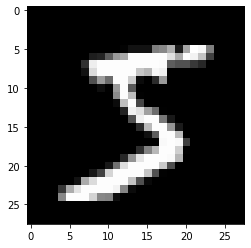

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:

import torchvision.transforms as transforms


In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Модель

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0220, -0.0140, -0.0099,  ...,  0.0145, -0.0273,  0.0163],
        [-0.0291,  0.0294, -0.0031,  ...,  0.0070,  0.0256, -0.0215],
        [ 0.0253,  0.0222,  0.0357,  ..., -0.0067, -0.0326, -0.0261],
        ...,
        [ 0.0297,  0.0156, -0.0116,  ...,  0.0338,  0.0013,  0.0135],
        [-0.0284, -0.0188, -0.0276,  ..., -0.0353,  0.0235, -0.0232],
        [ 0.0129,  0.0056,  0.0211,  ..., -0.0164, -0.0233,  0.0106]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0355,  0.0159, -0.0125,  0.0308,  0.0229,  0.0335,  0.0312, -0.0145,
         0.0153, -0.0140], requires_grad=True)

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([3, 9, 4, 7, 6, 0, 4, 3, 1, 6, 3, 5, 4, 9, 0, 3, 2, 1, 6, 3, 8, 7, 2, 7,
        8, 0, 0, 4, 9, 9, 3, 6, 2, 1, 9, 2, 3, 3, 2, 9, 0, 7, 5, 7, 8, 7, 9, 5,
        0, 9, 1, 2, 5, 5, 2, 3, 4, 0, 6, 8, 4, 1, 4, 0, 5, 4, 9, 5, 7, 7, 4, 7,
        3, 5, 5, 6, 7, 4, 0, 7, 7, 0, 0, 7, 3, 3, 0, 5, 7, 5, 5, 3, 2, 0, 7, 4,
        2, 2, 5, 4, 5, 8, 3, 2, 5, 2, 9, 8, 0, 2, 4, 8, 8, 7, 4, 8, 1, 7, 3, 7,
        0, 4, 4, 0, 5, 6, 4, 7])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
model

MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0203, -0.0164,  0.0094,  ..., -0.0346, -0.0338,  0.0168],
         [ 0.0103,  0.0305, -0.0151,  ..., -0.0307,  0.0174, -0.0006],
         [-0.0008, -0.0274,  0.0010,  ..., -0.0069, -0.0274, -0.0007],
         ...,
         [ 0.0278,  0.0252,  0.0348,  ..., -0.0139,  0.0018, -0.0337],
         [-0.0041,  0.0230, -0.0267,  ..., -0.0266,  0.0216,  0.0150],
         [ 0.0185, -0.0084,  0.0239,  ..., -0.0343, -0.0339,  0.0193]],
        requires_grad=True), Parameter containing:
 tensor([-2.6749e-02, -9.0318e-05,  1.7101e-02,  2.4514e-02, -1.8430e-02,
          7.7689e-03,  1.8607e-02, -1.0194e-02,  2.9086e-02,  1.7839e-02],
        requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 1.5187e-01,  3.9303e-01,  1.6386e-01, -1.3317e-02, -3.1055e-02,
         -6.1533e-03,  2.7594e-04, -3.6498e-02,  7.0518e-02,  3.7116e-02],
        [ 1.0443e-02,  4.1007e-01, -1.3080e-01,  2.4860e-02,  5.7517e-02,
         -2.2191e-02,  1.3715e-01, -1.1114e-01,  3.4142e-02,  1.3792e-01]])


In [ ]:
import torch.nn.functional as F


In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1073, 0.1366, 0.1086, 0.0910, 0.0894, 0.0916, 0.0922, 0.0889, 0.0989,
         0.0957],
        [0.0946, 0.1411, 0.0821, 0.0960, 0.0992, 0.0916, 0.1074, 0.0838, 0.0969,
         0.1075]])
Sum:  0.9999999403953552


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 1, 1, 1, 1, 1, 1, 8, 1, 6, 1, 8, 1, 1, 1, 1, 5, 1, 8, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 9, 1, 1, 9, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 5,
        1, 1, 1, 1, 8, 5, 1, 1, 1, 0, 6, 1, 5, 1, 1, 6, 2, 8, 1, 1, 1, 1, 1, 1,
        1, 8, 1, 1, 1, 1, 1, 8, 1, 1, 1, 8, 5, 1, 1, 1, 1, 0, 8, 6, 7, 1, 1, 1,
        1, 8, 1, 1, 1, 1, 1, 1])
tensor([0.1366, 0.1411, 0.1338, 0.1281, 0.1370, 0.1484, 0.1633, 0.1132, 0.1697,
        0.1446, 0.1503, 0.1098, 0.1468, 0.1505, 0.1901, 0.1666, 0.1168, 0.1297,
        0.1125, 0.1387, 0.1452, 0.1263, 0.1373, 0.1357, 0.1716, 0.1290, 0.1308,
        0.1180, 0.1256, 0.1203, 0.1350, 0.1360, 0.1469, 0.1136, 0.1557, 0.1730,
        0.1275, 0.1270, 0.1118, 0.1517, 0.1312, 0.1486, 0.1141, 0.1362, 0.1696,
        0.1248, 0.1978, 0.1451, 0.1375, 0.1474, 0.1527, 0.1359, 0.1436, 0.1699,
        0.1310, 0.1221, 0.1586, 0.1186, 0.1501, 0.1264, 0.1175, 0.1388, 0.1247,
       

In [ ]:
labels

tensor([9, 7, 8, 4, 9, 9, 0, 1, 0, 5, 2, 1, 2, 2, 3, 7, 1, 2, 1, 9, 4, 0, 9, 6,
        2, 6, 5, 6, 9, 9, 3, 4, 4, 1, 0, 3, 3, 5, 5, 7, 7, 7, 1, 8, 0, 9, 0, 8,
        3, 6, 3, 4, 2, 0, 4, 8, 8, 1, 4, 9, 7, 2, 8, 7, 0, 2, 8, 5, 0, 5, 3, 4,
        9, 8, 3, 6, 1, 9, 4, 9, 7, 1, 0, 8, 6, 0, 4, 5, 1, 1, 8, 4, 9, 6, 4, 6,
        3, 1, 0, 5, 0, 4, 4, 1, 9, 0, 8, 1, 5, 0, 0, 9, 6, 2, 1, 9, 6, 9, 9, 3,
        2, 3, 5, 2, 5, 3, 6, 4])

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)


tensor(0.0156)

In [ ]:
loss_fn = F.cross_entropy


In [ ]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3398, grad_fn=<NllLossBackward>)


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.07426819950342178, 'val_loss': 2.3166275024414062}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.9524, val_acc: 0.6010
Epoch [1], val_loss: 1.6817, val_acc: 0.7234
Epoch [2], val_loss: 1.4799, val_acc: 0.7619
Epoch [3], val_loss: 1.3281, val_acc: 0.7840
Epoch [4], val_loss: 1.2114, val_acc: 0.7951


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.1199, val_acc: 0.8039
Epoch [1], val_loss: 1.0466, val_acc: 0.8122
Epoch [2], val_loss: 0.9867, val_acc: 0.8185
Epoch [3], val_loss: 0.9368, val_acc: 0.8259
Epoch [4], val_loss: 0.8948, val_acc: 0.8291


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 0.8588, val_acc: 0.8322
Epoch [1], val_loss: 0.8275, val_acc: 0.8360
Epoch [2], val_loss: 0.8002, val_acc: 0.8380
Epoch [3], val_loss: 0.7762, val_acc: 0.8398
Epoch [4], val_loss: 0.7548, val_acc: 0.8425


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 0.7355, val_acc: 0.8449
Epoch [1], val_loss: 0.7182, val_acc: 0.8471
Epoch [2], val_loss: 0.7025, val_acc: 0.8488
Epoch [3], val_loss: 0.6882, val_acc: 0.8507
Epoch [4], val_loss: 0.6751, val_acc: 0.8529


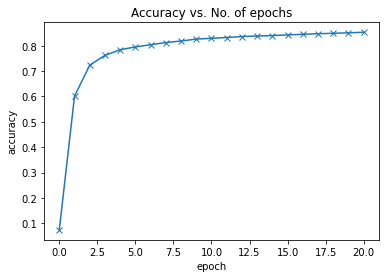

In [ ]:
# Replace these values with your results
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


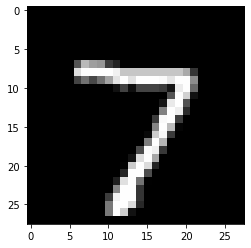

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
img.unsqueeze(0).shape


torch.Size([1, 1, 28, 28])

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.86083984375, 'val_loss': 0.6416943669319153}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')


In [ ]:
model.state_dict()


OrderedDict([('linear.weight',
              tensor([[-0.0160,  0.0122,  0.0008,  ..., -0.0272, -0.0128,  0.0200],
                      [-0.0092, -0.0322,  0.0314,  ...,  0.0291, -0.0302, -0.0327],
                      [ 0.0060, -0.0025,  0.0211,  ..., -0.0184,  0.0022,  0.0010],
                      ...,
                      [ 0.0046,  0.0216,  0.0335,  ..., -0.0189, -0.0117,  0.0314],
                      [ 0.0097,  0.0136,  0.0350,  ..., -0.0103,  0.0019, -0.0067],
                      [ 0.0239, -0.0192,  0.0332,  ..., -0.0102,  0.0351, -0.0334]])),
             ('linear.bias',
              tensor([-0.0342,  0.0735, -0.0336, -0.0260,  0.0268,  0.0788,  0.0197,  0.0607,
                      -0.0942, -0.0310]))])

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0160,  0.0122,  0.0008,  ..., -0.0272, -0.0128,  0.0200],
                      [-0.0092, -0.0322,  0.0314,  ...,  0.0291, -0.0302, -0.0327],
                      [ 0.0060, -0.0025,  0.0211,  ..., -0.0184,  0.0022,  0.0010],
                      ...,
                      [ 0.0046,  0.0216,  0.0335,  ..., -0.0189, -0.0117,  0.0314],
                      [ 0.0097,  0.0136,  0.0350,  ..., -0.0103,  0.0019, -0.0067],
                      [ 0.0239, -0.0192,  0.0332,  ..., -0.0102,  0.0351, -0.0334]])),
             ('linear.bias',
              tensor([-0.0342,  0.0735, -0.0336, -0.0260,  0.0268,  0.0788,  0.0197,  0.0607,
                      -0.0942, -0.0310]))])

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.86083984375, 'val_loss': 0.6416943669319153}

# Часть 4. Глубокие сети и CUDA

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [ ]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)


In [ ]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.2898406982421875
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1767, -0.0398, -0.0365,  0.0283,  0.2470,  0.0712,  0.0328, -0.0868,
          0.0304, -0.0521],
        [ 0.3048, -0.0346, -0.0436, -0.0851, -0.0275, -0.0131,  0.0545, -0.2314,
         -0.0294, -0.1926]])


In [ ]:
history_deep = fit(50, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.2347, val_acc: 0.2214
Epoch [1], val_loss: 2.1602, val_acc: 0.3668
Epoch [2], val_loss: 2.0682, val_acc: 0.5032
Epoch [3], val_loss: 1.9650, val_acc: 0.5916
Epoch [4], val_loss: 1.8538, val_acc: 0.6343
Epoch [5], val_loss: 1.7366, val_acc: 0.6601
Epoch [6], val_loss: 1.6163, val_acc: 0.6835
Epoch [7], val_loss: 1.4981, val_acc: 0.7152
Epoch [8], val_loss: 1.3860, val_acc: 0.7424
Epoch [9], val_loss: 1.2831, val_acc: 0.7587
Epoch [10], val_loss: 1.1907, val_acc: 0.7706
Epoch [11], val_loss: 1.1092, val_acc: 0.7809
Epoch [12], val_loss: 1.0381, val_acc: 0.7901
Epoch [13], val_loss: 0.9761, val_acc: 0.7978
Epoch [14], val_loss: 0.9223, val_acc: 0.8054
Epoch [15], val_loss: 0.8754, val_acc: 0.8120
Epoch [16], val_loss: 0.8344, val_acc: 0.8177
Epoch [17], val_loss: 0.7984, val_acc: 0.8218
Epoch [18], val_loss: 0.7665, val_acc: 0.8288
Epoch [19], val_loss: 0.7381, val_acc: 0.8321
Epoch [20], val_loss: 0.7128, val_acc: 0.8350
Epoch [21], val_loss: 0.6900, val_acc: 0.838

In [ ]:
torch.cuda.is_available()

True